In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns
sns.set_style('whitegrid')
from plotly.subplots import make_subplots

In [ ]:
yf.__version__

'0.2.52'

In [ ]:
# Define stock tickers and date range
tickers = ['PG', 'JNJ',
           '^GSPC']
start_date = '2010-03-02'
end_date = '2024-02-28'

# Fetch data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    print(f"Downloaded {ticker}")

# Save individual CSVs (optional)
for ticker, data in stock_data.items():
   data.to_csv(f"{ticker}_data.csv")

[*********************100%***********************]  1 of 1 completed


Downloaded PG


[*********************100%***********************]  1 of 1 completed


Downloaded JNJ


[*********************100%***********************]  1 of 1 completed


Downloaded ^GSPC


In [ ]:
# Convert 'Date' column to datetime objects with UTC timezone and extract the date
for ticker, data in stock_data.items():

    data['Date'] = data.index.date
    stock_data[ticker] = data.set_index('Date')  # Set 'Date' as index for each stock DataFrame

In [ ]:
#Fetch data for PG
pg_data = stock_data['PG']
pg_data = pg_data.xs('PG',axis=1,level='Ticker')
pg_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.147202,41.250538,40.908237,41.153661,8004000
2010-03-03,41.043854,41.269903,40.966352,41.114898,8608300
2010-03-04,41.121353,41.431364,40.953433,41.108438,8600300
2010-03-05,41.134281,41.192408,40.720937,41.134281,10101100
2010-03-08,40.811363,41.121372,40.708027,41.043870,11293300


In [ ]:
# Fetch data for JNJ
jnj_data = stock_data['JNJ']
jnj_data = jnj_data.xs('JNJ',axis=1,level='Ticker')
jnj_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.169708,41.299500,40.897148,41.085346,9014000
2010-03-03,41.143749,41.370883,41.026937,41.267050,9360400
2010-03-04,41.254066,41.338431,41.124275,41.228108,8067200
2010-03-05,41.559074,41.578542,41.241085,41.312471,10633600
2010-03-08,41.662907,41.799192,41.546095,41.585035,33380500


In [ ]:
# Fetch data for'^GSPC'
gspc_data = stock_data['^GSPC']
gspc_data = gspc_data.xs('^GSPC',axis=1,level='Ticker')
gspc_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000


Feature Engineering:

Computing the stocks the "Returns" feature

Creating a “Tomorrow” column

Creating a “stocks-Direction” column

Computing the Return, Tomorrow, and Stock_Direction columns for each stocks

In [ ]:
# For PG stock
pg_data['Return'] = pg_data['Close'].pct_change()
# For PG stock:
pg_data['Tomorrow'] = pg_data['Close'].shift(-1)
# For PG stock
pg_data['Stocks_Direction'] = (pg_data['Close'] > pg_data['Close'].shift(1)).astype(int)

In [ ]:
pg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
# Handling 'Return' column NaNs
pg_data.loc[:, 'Return'] = pg_data['Return'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Return'] = pg_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
pg_data = pg_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction column NaNs"
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].ffill()  # Fill other potential NaNs using forward fill


In [ ]:
pg_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [ ]:
pg_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.147202,41.250538,40.908237,41.153661,8004000,0.000000,41.043854,0
2010-03-03,41.043854,41.269903,40.966352,41.114898,8608300,-0.002512,41.121353,0
2010-03-04,41.121353,41.431364,40.953433,41.108438,8600300,0.001888,41.134281,1
2010-03-05,41.134281,41.192408,40.720937,41.134281,10101100,0.000314,40.811363,1
2010-03-08,40.811363,41.121372,40.708027,41.043870,11293300,-0.007850,40.882385,0


In [ ]:
# For JNJ stock
jnj_data['Return'] = jnj_data['Close'].pct_change()
# For JNJ stock:
jnj_data['Tomorrow'] = jnj_data['Close'].shift(-1)
# For JNJ stock
jnj_data['Stocks_Direction'] = (jnj_data['Close'] > jnj_data['Close'].shift(1)).astype(int)


In [ ]:
jnj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
# Handling 'Return' column NaNs
jnj_data.loc[:, 'Return'] = jnj_data['Return'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Return'] = jnj_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
jnj_data = jnj_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction' column NaNs
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].ffill()

In [ ]:
jnj_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [ ]:
jnj_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.169708,41.299500,40.897148,41.085346,9014000,0.000000,41.143749,0
2010-03-03,41.143749,41.370883,41.026937,41.267050,9360400,-0.000631,41.254066,0
2010-03-04,41.254066,41.338431,41.124275,41.228108,8067200,0.002681,41.559074,1
2010-03-05,41.559074,41.578542,41.241085,41.312471,10633600,0.007393,41.662907,1
2010-03-08,41.662907,41.799192,41.546095,41.585035,33380500,0.002498,41.708332,1


In [ ]:
# For ^GSPC stock
gspc_data['Return'] = gspc_data['Close'].pct_change()
# For ^GSPC stock:
gspc_data['Tomorrow'] = gspc_data['Close'].shift(-1)
# For ^GSPC stock
gspc_data['Stocks_Direction'] = (gspc_data['Close'] > gspc_data['Close'].shift(1)).astype(int)

In [ ]:
gspc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
gspc_data.loc[:, 'Return'] = gspc_data['Return'].fillna(0)  # Fill first row with 0
gspc_data.loc[:, 'Return'] = gspc_data['Return'].ffill()

gspc_data = gspc_data.iloc[:-1]  # Drop the last row

gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].fillna(0)
gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].ffill()

In [ ]:
gspc_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [ ]:
gspc_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000,0.000000,1118.790039,0
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000,0.000429,1122.969971,1
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000,0.003736,1138.699951,1
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000,0.014007,1138.500000,1
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000,-0.000176,1140.449951,0


Data Preparation, Modelling & Evaluation:

In [ ]:
!pip install mlflow pandas numpy scikit-learn xgboost tensorflow statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.2/648.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
# Import necessary modules and the KFold class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import mlflow
import mlflow.xgboost
import mlflow.keras
from sklearn.model_selection import KFold

In [ ]:
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]  # Features
y = pg_data["Stocks_Direction"]  # Target

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pg_data)

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions
xgb_predictions = xgb_model.predict(X_test)
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [ ]:
# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Initialize lists to store cross-validation scores
xgb_cv_scores = []
# Perform cross-validation manually
for train_index, test_index in kfold.split(X):
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model for current fold
    xgb_model_fold = XGBClassifier(random_state=42)
    xgb_model_fold.fit(X_train_fold, y_train_fold)
    # Make predictions
    xgb_predictions_fold = xgb_model_fold.predict(X_test_fold)
    # Evaluate the model for current fold
    xgb_accuracy_fold = accuracy_score(y_test_fold, xgb_predictions_fold)
    xgb_cv_scores.append(xgb_accuracy_fold)

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("XGBoost Mean Accuracy:", np.mean(xgb_cv_scores))
print("XGBoost Accuracy Standard Deviation:", np.std(xgb_cv_scores))

XGBoost Cross-Validation Scores: [0.9929078014184397, 0.9957386363636364, 0.9957386363636364, 0.9985795454545454, 0.9971590909090909]
XGBoost Mean Accuracy: 0.9960247421018698
XGBoost Accuracy Standard Deviation: 0.001881106036256779


Interpretation

High Performance: The high mean accuracy (0.996) indicates that the XGBoost model is performing exceptionally well on the data, achieving near-perfect accuracy in most folds.

Consistency: The low standard deviation (0.00188) suggests that the model's performance is consistent and not overly sensitive to the specific data split used for training and evaluation.

Generalization: These results provide strong evidence that the model is generalizing well to unseen data, as it maintains high accuracy across different folds.

In [ ]:
# Initialize XGBoost model with regularization, To prevent oveverfitting
final_model = XGBClassifier(
    reg_alpha=0.1,  # L1 regularization strength
    reg_lambda=1.0,  # L2 regularization strengt
    )
# Train the model
final_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = final_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [ ]:
# Calculate the traning accuracy
y_train_pred = final_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.9996448863636364


In [ ]:
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [ ]:
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix- XGBoost")
plt.show()

Performance Analysis

1. High Accuracy: The model performs well with very few misclassifications.

2. Low False Positive Rate (FPR): Only 3 out of 353 actual negatives were incorrectly classified.

3. Low False Negative Rate (FNR): Only 2 out of 354 actual positives were misclassified.

4. Balanced Classification: The class distribution seems balanced with similar numbers of true positives and true negatives.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

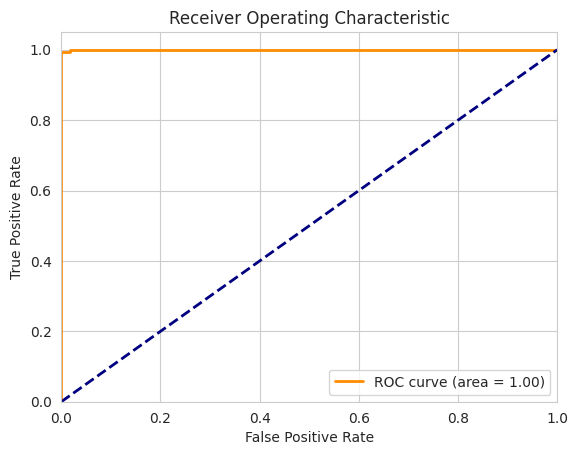

In [ ]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Scale data for LSTM
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Make predictions
lstm_predictions = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)

# Evaluate the model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
print(f"LSTM Accuracy: {lstm_accuracy}")
print(classification_report(y_test, lstm_predictions))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5198 - loss: 0.6923 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5220 - loss: 0.6894 - val_accuracy: 0.5021 - val_loss: 0.6898
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5253 - loss: 0.6820 - val_accuracy: 0.5064 - val_loss: 0.6795
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5462 - loss: 0.6599 - val_accuracy: 0.6709 - val_loss: 0.6138
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7052 - loss: 0.5793 - val_accuracy: 0.8738 - val_loss: 0.4672
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8375 - loss: 0.4417 - val_accuracy: 0.8667 - val_loss: 0.3597
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8795 - loss: 0.3345 - val_accuracy: 0.9546 - val_loss: 0.2640
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9078 - loss: 0.2706 - val_accuracy: 0.9106 - val

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation scores
lstm_cv_scores = []

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for LSTM
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Reshape data for LSTM
    X_train_fold_reshaped = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0], 1, X_train_fold_scaled.shape[1])
    X_test_fold_reshaped = X_test_fold_scaled.reshape(X_test_fold_scaled.shape[0], 1, X_test_fold_scaled.shape[1])

    # Train the model
    lstm_model.fit(X_train_fold_reshaped, y_train_fold, epochs=20, batch_size=32, verbose=0)  # Suppress verbose output

    # Make predictions
    lstm_predictions_fold = (lstm_model.predict(X_test_fold_reshaped) > 0.5).astype(int)

    # Calculate accuracy for current fold
    accuracy_fold = accuracy_score(y_test_fold, lstm_predictions_fold)

    # Store the accuracy
    lstm_cv_scores.append(accuracy_fold)

# Print the cross-validation scores
print("LSTM Cross-Validation Scores:", lstm_cv_scores)
print("LSTM Mean Accuracy:", np.mean(lstm_cv_scores))
print("LSTM Accuracy Standard Deviation:", np.std(lstm_cv_scores))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
LSTM Cross-Validation Scores: [0.9560283687943263, 0.953125, 0.9744318181818182, 0.9659090909090909, 0.9815340909090909]
LSTM Mean Accuracy: 0.9662056737588653
LSTM Accuracy Standard Deviation: 0.010746156039370442


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

<ipython-input-68-28128457da66>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_full, y_val_fold = y[train_index], y[val_index]


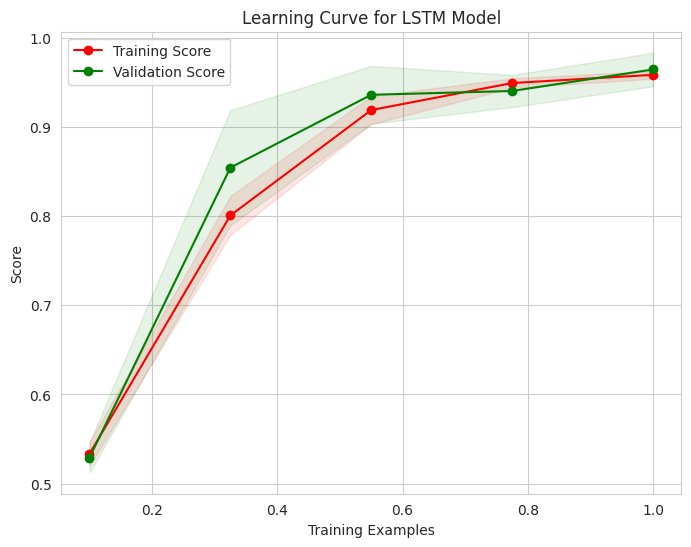

In [ ]:
def learning_curve_keras(model, X, y, cv=5, scoring="accuracy", epochs=20, batch_size=32):
    """
    Generate a learning curve for a Keras model using KFold cross-validation.

    Args:
        model: The compiled Keras model.
        X: The input data.
        y: The target data.
        cv: The number of folds for cross-validation.
        scoring: The scoring metric to use.
        epochs: The number of epochs to train for.
        batch_size: The batch size for training.

    Returns:
        train_sizes: The training set sizes used.
        train_scores: The training scores for each fold and training size.
        val_scores: The validation scores for each fold and training size.
    """

    train_sizes = np.linspace(0.1, 1.0, 5)  # 10% to 100% of the training set
    train_scores = []
    val_scores = []

    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    for train_index, val_index in kfold.split(X):
        X_train_full, X_val_fold = X[train_index], X[val_index]
        y_train_full, y_val_fold = y[train_index], y[val_index]

        fold_train_scores = []
        fold_val_scores = []

        for size in train_sizes:
            subset_size = int(size * len(X_train_full))
            X_train_fold, y_train_fold = X_train_full[:subset_size], y_train_full[:subset_size]

            # Clone model to prevent weight leakage
            model_clone = tf.keras.models.clone_model(model)
            model_clone.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train the model
            history = model_clone.fit(
                X_train_fold, y_train_fold,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val_fold, y_val_fold),
                verbose=0
            )

            # Store final epoch scores
            fold_train_scores.append(history.history[scoring][-1])
            fold_val_scores.append(history.history[f'val_{scoring}'][-1])

        train_scores.append(fold_train_scores)
        val_scores.append(fold_val_scores)

    return train_sizes, np.array(train_scores), np.array(val_scores)


# Call function
train_sizes, train_scores, val_scores = learning_curve_keras(lstm_model, X_train_reshaped, y_train, cv=5, scoring="accuracy")

# Compute means and standard deviations across folds
train_mean = np.mean(train_scores, axis=0)
train_std = np.std(train_scores, axis=0)
val_mean = np.mean(val_scores, axis=0)
val_std = np.std(val_scores, axis=0)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, 'o-', color="g", label="Validation Score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve for LSTM Model")
plt.legend()
plt.grid(True)
plt.show()


The model learns effectively as more data is provided.

No significant overfitting, as training and validation scores remain close.

Good generalization, with validation performance nearly matching training performance at larger sample sizes.

Variance is higher at smaller dataset sizes, meaning the model might struggle with small datasets.

In [ ]:
# Prepare the data for the forecast by Select the last 14 days of data for prediction
last_14_days_data = pg_data.tail(14)

# Select the features for prediction
forecast_features = last_14_days_data[["Close", "High", "Low", "Open", "Volume", "Return"]]

# initialize and fit the XGBoost model
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]
y = pg_data["Stocks_Direction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Initialize and train the XGBoost model (
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Use the same scaler as before (StandardScaler for XGBoost)
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the features using the fitted scaler
forecast_features_scaled = scaler.transform(forecast_features)

# Make predictions for the next 14 days
forecast_predictions = xgb_model.predict(forecast_features_scaled)

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'Date': last_14_days_data.index, 'Stocks_Direction': forecast_predictions})

# Print the forecast
print(forecast_df)

          Date  Stocks_Direction
0   2024-02-06                 1
1   2024-02-07                 1
2   2024-02-08                 0
3   2024-02-09                 0
4   2024-02-12                 0
5   2024-02-13                 0
6   2024-02-14                 0
7   2024-02-15                 1
8   2024-02-16                 1
9   2024-02-20                 1
10  2024-02-21                 1
11  2024-02-22                 1
12  2024-02-23                 1
13  2024-02-26                 0


In [ ]:
import mlflow
import mlflow.xgboost
import mlflow.keras

# Start an MLflow run
with mlflow.start_run():
    # ... (Your XGBoost model training code) ...
    mlflow.xgboost.log_model(xgb_model, "xgboost-model")

    # ... (Your LSTM model training code) ...
    mlflow.keras.log_model(lstm_model, "lstm-model")

    # Log parameters and metrics
    mlflow.log_param("xgboost_learning_rate", 0.1)
    mlflow.log_metric("xgboost_accuracy", xgb_accuracy)
    mlflow.log_param("lstm_epochs", 20)
    mlflow.log_metric("lstm_accuracy", lstm_accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:09] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/02/12 21:02:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/12 21:02:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/12 21:02:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
!mlflow ui

[2025-02-12 23:20:35 +0000] [83146] [INFO] Starting gunicorn 23.0.0
[2025-02-12 23:20:35 +0000] [83146] [INFO] Listening at: http://127.0.0.1:5000 (83146)
[2025-02-12 23:20:35 +0000] [83146] [INFO] Using worker: sync
[2025-02-12 23:20:35 +0000] [83147] [INFO] Booting worker with pid: 83147
[2025-02-12 23:20:35 +0000] [83148] [INFO] Booting worker with pid: 83148
[2025-02-12 23:20:35 +0000] [83153] [INFO] Booting worker with pid: 83153
[2025-02-12 23:20:35 +0000] [83154] [INFO] Booting worker with pid: 83154
